In [ ]:
%pip install polars-lts-cpu 

In [ ]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv('dados_enem_2021_BA.csv')

In [9]:
df.head(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
6,210053741476,2021,6,F,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,453.4,438.3,503.4,379.5,BCDBECADBCCDCEBBBCEDCBCEBACDBEEAEDCDBCAACEEBD,BDDCABAEEAABECBBCBEDBEA

In [10]:
df.tail(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
266184,210053251102,2021,11,F,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2909802,Cruz das Almas,29,BA,1,1,1,1,1045.0,1017.0,1028.0,1035.0,409.0,366.6,406.8,415.4,CCCCACEEECECEAECECEEEECCEDEEEDACEDDAEEDCCCCCC,DCCCCCCCEBCCCBEDCCCCCCDCCCCDCCDCACDDEDEBDCCEE,99999BBBCCEACBECCACCCCECAECCEEEBCCCCBAEECCCACC...,EDDCEDBBBBAECAEBECCCDBACDBEEEBCCDBCEEEEDCCEDE,1,BACEECDDDEABEEDCBACBDABCCAEAAEABACCDAAACCAEEA,ACBCBACADEABDBDBABBCCBABABDDBBAEDAEEEEBAAEBED,ADCECCBBCEDDAEBABACBCACBEDACCEAEDACABAAABBAAEB...,DBDBBDBAACBADBBDECBDBBACEBCBDCCECDEEDCADEABBB,1.0,80.0,40.0,40.0,100.0,0.0,260.0
266185,210052439300,2021,8,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266186,210053752138,2021,7,F,1,3,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266187,210053346615,2021,5,F,1,1,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919504,Livramento de Nossa Senhora,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266188,210054023670,2021,5,F,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,1045.0,1017.0,1028.0,1035.0,463.8,474.9,333.3,357.8,AEEECBDDBBCBDBCCBBABEEBCEADDCCBDEDDAEEACCECEE,DBCECABAEBACDADCEDBCCBEEACEBAACECEEDCABBDEEBD,CBCDB99999CABBCBACECCEABBBCEEDDCCBDDCAEDBBDEAC...,ECECBDDECBABAACCCCCACEAEDDDCCADAEEDECCDBDCEDB,0,BACEECDDDEABEEDCBACBDABCCAEAAEABACCDAAACCAEEA,ACBCBACADEABDBDBABBCCBABABDDBBAEDAEEEEBAAEBED,ADCECCBBCEDDAEBABACBCACBEDACCEAEDACABAAABBAAEB...,DBDBBDBAACBADBBDECBDBBACEBCBDCCECDEEDCADEABBB,1.0,80.0,40.0,40.0,120.0,0.0,280.0
266189,210051432069,2021,12,M,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,M,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,M,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,M,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266193,210054027870,2021,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(266194, 51)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266194 entries, 0 to 266193
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            266194 non-null  int64  
 1   NU_ANO                  266194 non-null  int64  
 2   TP_FAIXA_ETARIA         266194 non-null  int64  
 3   TP_SEXO                 266194 non-null  object 
 4   TP_ESTADO_CIVIL         266194 non-null  int64  
 5   TP_COR_RACA             266194 non-null  int64  
 6   TP_NACIONALIDADE        266194 non-null  int64  
 7   TP_ST_CONCLUSAO         266194 non-null  int64  
 8   TP_ANO_CONCLUIU         266194 non-null  int64  
 9   TP_ESCOLA               266194 non-null  int64  
 10  TP_ENSINO               84388 non-null   float64
 11  IN_TREINEIRO            266194 non-null  int64  
 12  CO_MUNICIPIO_ESC        47820 non-null   float64
 13  NO_MUNICIPIO_ESC        47820 non-null   object 
 14  CO_UF_ESC           

In [18]:
# verificar missing (dados ausentes)
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending= False)

TP_DEPENDENCIA_ADM_ESC    82.035658
CO_UF_ESC                 82.035658
TP_SIT_FUNC_ESC           82.035658
TP_LOCALIZACAO_ESC        82.035658
SG_UF_ESC                 82.035658
CO_MUNICIPIO_ESC          82.035658
NO_MUNICIPIO_ESC          82.035658
TP_ENSINO                 68.298309
CO_PROVA_MT               34.124736
CO_PROVA_CN               34.124736
NU_NOTA_MT                34.124736
TX_RESPOSTAS_CN           34.124736
TX_RESPOSTAS_MT           34.124736
TX_GABARITO_CN            34.124736
NU_NOTA_CN                34.124736
TX_GABARITO_MT            34.124736
TX_GABARITO_CH            30.560418
NU_NOTA_COMP2             30.560418
NU_NOTA_COMP5             30.560418
CO_PROVA_LC               30.560418
CO_PROVA_CH               30.560418
NU_NOTA_COMP4             30.560418
NU_NOTA_LC                30.560418
NU_NOTA_COMP3             30.560418
TX_RESPOSTAS_CH           30.560418
NU_NOTA_CH                30.560418
TX_RESPOSTAS_LC           30.560418
NU_NOTA_COMP1             30

In [13]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,266194.0,2.100527e+11,981957.687860,2.100510e+11,2.100519e+11,2.100527e+11,2.100536e+11,2.100545e+11
NU_ANO,266194.0,2.021000e+03,0.000000,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
TP_FAIXA_ETARIA,266194.0,5.710166e+00,3.878161,1.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,266194.0,1.048991e+00,0.411030,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,266194.0,2.301832e+00,0.907761,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
TP_NACIONALIDADE,266194.0,1.029787e+00,0.194507,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,266194.0,1.595810e+00,0.719902,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,266194.0,2.846845e+00,4.468500,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.500000e+01
TP_ESCOLA,266194.0,1.379663e+00,0.570947,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
TP_ENSINO,84388.0,1.013272e+00,0.114438,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [20]:
df.index

RangeIndex(start=0, stop=266194, step=1)

In [6]:
df.nunique().sort_values(ascending=True)

NU_ANO                         1
SG_UF_PROVA                    1
CO_UF_PROVA                    1
TP_LINGUA                      2
TP_SEXO                        2
TP_LOCALIZACAO_ESC             2
IN_TREINEIRO                   2
TP_ENSINO                      2
TP_PRESENCA_MT                 3
TP_PRESENCA_CH                 3
TP_PRESENCA_CN                 3
TP_PRESENCA_LC                 3
TP_ESCOLA                      3
TP_SIT_FUNC_ESC                4
TP_ST_CONCLUSAO                4
TP_DEPENDENCIA_ADM_ESC         4
TP_NACIONALIDADE               5
TP_ESTADO_CIVIL                5
TP_COR_RACA                    6
TX_GABARITO_CN                 8
TX_GABARITO_CH                 8
TX_GABARITO_MT                 8
TP_STATUS_REDACAO              8
NU_NOTA_COMP2                 10
TX_GABARITO_LC                10
NU_NOTA_COMP4                 11
NU_NOTA_COMP3                 11
NU_NOTA_COMP1                 11
NU_NOTA_COMP5                 11
TP_ANO_CONCLUIU               16
CO_PROVA_C

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.TP_ESCOLA

0         2
1         2
2         2
3         1
4         1
         ..
266189    1
266190    1
266191    1
266192    1
266193    1
Name: TP_ESCOLA, Length: 266194, dtype: int64

In [ ]:
#Distribuição de frequência
df.TP_ESCOLA.value_counts()

TP_ESCOLA
1    177170
2     76984
3     12040
Name: count, dtype: int64

In [12]:
df['TP_SEXO'].value_counts()

TP_SEXO
F    171997
M     94197
Name: count, dtype: int64

In [16]:
df.loc[0:, 'TP_SEXO']

0         F
1         F
2         F
3         F
4         M
         ..
266189    M
266190    M
266191    M
266192    M
266193    F
Name: TP_SEXO, Length: 266194, dtype: object

In [17]:
df[['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
266189,M,1
266190,M,1
266191,M,1
266192,M,1


In [20]:
df.loc[0:, ['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
266189,M,1
266190,M,1
266191,M,1
266192,M,1


In [7]:
# Selecionar colunas pela posição
df.iloc[:, 0:4]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO
0,210051128744,2021,4,F
1,210054173438,2021,5,F
2,210052118573,2021,3,F
3,210052350230,2021,10,F
4,210053156861,2021,9,M
...,...,...,...,...
266189,210051432069,2021,12,M
266190,210051106175,2021,14,M
266191,210051995005,2021,11,M
266192,210053234415,2021,12,M


In [25]:
df.select_dtypes(include=[int, float])

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.select_dtypes(exclude=object)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.select_dtypes(include=object)

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
0,F,NaN,NaN,Ruy Barbosa,BA,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
1,F,Salvador,BA,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,NaN,NaN,Barreiras,BA,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE
3,F,NaN,NaN,Santo Estêvão,BA,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
4,M,NaN,NaN,Feira de Santana,BA,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,M,NaN,NaN,Alagoinhas,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,M,NaN,NaN,Juazeiro,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,M,NaN,NaN,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,M,NaN,NaN,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Separação de tipos de dados <Strings/Objetos> de <Numeral>
cat_cols = df.select_dtypes(include=object).columns.tolist()
num_cols = df.select_dtypes(include=[int, float]).columns.tolist()

In [9]:
cat_cols

['TP_SEXO',
 'NO_MUNICIPIO_ESC',
 'SG_UF_ESC',
 'NO_MUNICIPIO_PROVA',
 'SG_UF_PROVA',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [31]:
num_cols

['NU_INSCRICAO',
 'NU_ANO',
 'TP_FAIXA_ETARIA',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [10]:
# Existe diferença na nota de matemática para alunos de escola pública e privada?

# Alunos de escola pública
df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

np.float64(487.37504991538157)

In [ ]:
# Alunos de escola particular
df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

np.float64(579.8338996340826)

In [40]:
# Alunos de escola particular
df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])

C:\Users\Aryman\AppData\Local\Temp\ipykernel_9960\1866622195.py:2: FutureWarning: The provided callable <function mean at 0x0000027CE57A7D80> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])
C:\Users\Aryman\AppData\Local\Temp\ipykernel_9960\1866622195.py:2: FutureWarning: The provided callable <function median at 0x0000027CE5893C40> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])


mean      579.8339
median    581.6000
Name: NU_NOTA_MT, dtype: float64

In [11]:
# Alunos de escola público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])

C:\Users\Aryman\AppData\Local\Temp\ipykernel_228\3416763490.py:2: FutureWarning: The provided callable <function mean at 0x00000198FBEA4220> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])
C:\Users\Aryman\AppData\Local\Temp\ipykernel_228\3416763490.py:2: FutureWarning: The provided callable <function median at 0x00000198FBFC0680> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])


mean      487.37505
median    468.90000
Name: NU_NOTA_MT, dtype: float64

In [13]:
df.query('TP_SEXO == "M"').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
94604,210052745374,2021,15,M,1,3,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2909802,Cruz das Almas,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,582.4,656.0,503.8,590.8,EADCEDEBECDBDABEEAECCDACBDAECDBEBABACCAECEBEC,ECAAAADBCAEACABEECBBDEBDBBDEBEAABCEEDEBBCAEAB,ACABB99999DCBAEBBCDECBDADCEEEADDDBEDDABCEADECD...,BDCDBBECCDDAECECDBCAADBDADDBBEBAEDCCBCCACEDBC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,100.0,80.0,120.0,540.0
129895,210053770643,2021,5,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929206,São Francisco do Conde,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,516.4,495.7,459.5,629.8,EDDACCCDBECDCBACDBAADBDBDDECBBCECDEBDDBAAEBEE,BADDADBBCCDEEBADBECAEBDBAEBDBDACBACDBDBCADBAB,BECAC99999BBCEAADCBEDBBBDEDAEEBCCACADBADBADADE...,ADBBDDCADDBCEBCAABACEACDDAEDEBEDCBEECAEBACDAA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,100.0,120.0,120.0,100.0,80.0,520.0
158582,210051440270,2021,3,M,1,3,1,2,0,3,1.0,0,2910800.0,Feira de Santana,29.0,BA,4.0,1.0,1.0,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118478,210053386324,2021,3,M,1,1,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2908101,Cocos,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,355.6,519.0,378.9,427.8,ACABDBAEAECCCBEBAAEAACEACCEBCDDCABBEADAAABDBC,BAACCCABBADBCADACEADADEABCEDCAAAECBAAADAACDBA,99999DBABBABBEBEADADCEEADAEADACACDEECDCACAADAB...,BABEECDBECDABEEECBCAACADEAEDBBAEBAACDBBBBAABE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,120.0,100.0,120.0,560.0
117559,210051584749,2021,14,M,2,3,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913903,Ipiaú,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.query('TP_SEXO == "M"')['TP_SEXO'].unique()

array(['M'], dtype=object)

In [15]:
df.query('(TP_SEXO == "M") & (IN_TREINEIRO == 1)').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
68689,210054027389,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928703,Santo Antônio de Jesus,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,410.8,435.6,410.9,487.3,EEDABDBEECDECCCEEBACEBCCBDEBDEDACECDECCDBCAAC,CBDCCABDBECDBDBDCBBCCEADBBCDBAAEDCCBCDABBEDCD,EBBCC99999EBBACABBDCBBEAACCBBDBBEECABCAACBEAAE...,CDBDEDCBBADBACEBEBEACEECBCBCCACEBDBCABADBBDCA,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,80.0,120.0,80.0,520.0
218065,210051396935,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905602,Camacan,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,441.3,457.4,478.0,533.2,CBDCDDCDCCCECBDBABEDADDECBDBBECECEDADCABEDBDE,BCACDCABDDEBABACBCECBCCBEBACEDCECDEBEAADADBCB,BEADB99999BCABEDDADDCADBCADCDEBAACBACCBDCBEDBB...,ADEBDBDCADBBEDADBCABDADBCBDADBBDCDECBACDADBBA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,140.0,180.0,200.0,880.0
171113,210051207637,2021,1,M,0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,514.0,543.7,545.5,577.9,ABDEBEBAAADABBDCECBAABBEBCBBEAACEECDCDBBDEBCE,BACCCCDDADEDABBAEBEADCCCCEEEBDAEDABBBEAACCBDC,CDAAB99999BACCEADCDDDDCDCECBEEBBCADAECBDBACACD...,CDCDDCBCABCCDBCCBBBBCABEEAECDECDACBCEDEEABAEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,80.0,120.0,100.0,0.0,420.0
143985,210054187309,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2917706,Jaguarari,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,516.5,472.9,515.6,389.5,ACBDCDBCDCEEBCDCACCBBADADDDBCCBDECCAAEDBBCBCD,BACBABCCAAEBDECDAABECECAAAACBADDBBDACADDACACD,AABDA99999CDEADDDADADCDADCCDAAEDDAEDBCEECDAACD...,DAEBBBDEBCECEAEBCCBDBACEBADADBCDBBAACDDEDECCD,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,80.0,140.0,140.0,600.0
136532,210053322576,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,613.2,667.9,629.4,749.3,CBDCDBACEEACEEDCCEBCCBDABBDCBCBCECBAB*DABEACB,CBAAAEEBBBABEECE.ADEADBEACACADDDDEBBBADBCBABC,AEBCA99999BDDACDEACCBBDABEBBACEADEEBBAACADDDDB...,ECBCCABCBBDDAEDDCABEEEEAABCEBEDCCDDBEDBDCECBA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,180.0,160.0,140.0,180.0,820.0


In [17]:
df.query('(TP_SEXO == "M") | (IN_TREINEIRO == 1)').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
205031,210052112467,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914802,Itabuna,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,392.5,543.2,522.8,535.5,ADECBCDEEEEBDDCCADDAEAEDCDBBAECAEDBAEBCDBCEDC,DADBADCBAAEBBABCECABAEBBAADCCDBABDBEBABECACDC,99999ACACEDEBEBDDBAEBCECBBCDAADDDCEDDAACDBDCAC...,ECCAEDBEBBDCCACACBEBAACBDACDEBCBCBCACBCACDCAD,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,160.0,120.0,140.0,80.0,620.0
15246,210052114115,2021,2,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,409.5,591.9,513.9,427.2,DABACCDCAACEDCAABEDACBAEABEAEAAECCEDDBDAAECDB,CAECDAEBCEDAABBADCBABCEECAECBDCEADBADACDCEBDC,99999CEEAADAADEAECDDADBDEABACEACCEDACCABDEADCD...,CEBBCADCAEBCCDAECDDACBECADBBEADBECACCEAEADABD,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,120.0,120.0,120.0,600.0
157637,210053742546,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914406,Iraquara,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,476.2,510.2,412.1,606.1,CCDEBDAEEABADDCAEEABBAADBADDAECCBCECBBBDCECAE,DBABBCDEBBDABEBDCDBACCEEAEAECCDEDEBADCDEAEACC,ABCBD99999AACADBBAEECCEABDCDBEAEDCBBAACEDEECDB...,ECCAAABBDCDAEACADDDBEBECBECABEACCBDEDDBECDBAE,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,120.0,140.0,120.0,600.0
109089,210053111054,2021,11,M,1,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,682.9,633.0,590.3,695.2,CCBABDABEEEDEEAEBCACBBCABADCBCDAECDADCABBECED,ECBAAEEEBDABCECEBEAAADBE.CAEDEAADEBBDAADCBADC,99999EAACABDCDBCCADCBBEADDBDABEADCEBCDBAEEDDCE...,ECCDEBBCDCDCABDDCABADEDBBEEDCDDCEAEAEDCCBDBCA,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,200.0,140.0,160.0,200.0,820.0
165934,210053291746,2021,3,M,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,2.0,1.0,1.0,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,599.7,645.4,613.7,650.3,BAEDABBDABBDEDADDADBBEECDBDAEBEDDCADDDADBADCA,AEECCAEEBADBCAEBEAEEBDDBBBAABCDBADABBBAECCEDA,ABEAC99999CDBBDDBABBDCBACBDBEDDDBEDEEEEAAACAAE...,DABACACDDCDCCBCBEABEDCCBDDCDBBBEBDEBDCBDDDDBC,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,120.0,120.0,40.0,500.0


In [19]:
mask = df.TP_SEXO == 'M'

In [20]:
df[mask]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
7,210053790986,2021,1,M,1,1,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907202,Casa Nova,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,590.9,659.7,593.6,586.8,BADCBEEBECDDEABAEDEBCDCCDABBBEBBDDACCCADBEACE,EBBBEADACABBBADEECBAAEDDBBADCDADBCADDEBBCCEAB,ACBAB99999DCEADCADACBDEAEDDABDADCBBBDABCDDDECB...,DDEBEEEDDDCAEEBACBEAADDDCCEDEEBABEECEBEEBCAAC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,180.0,160.0,200.0,200.0,900.0
9,210054171092,2021,4,M,1,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,210052237624,2021,5,M,1,2,1,2,0,2,1.0,0,2910503.0,Entre Rios,29.0,BA,2.0,1.0,1.0,2910503,Entre Rios,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,594.4,572.8,536.6,469.6,DCADABEEABDAEDABADCABEACABDAEBECBBBDCCCDBCBCD,BEECCABABABBEAEACBADCAEBEDAABAEAEADCCCAAEEBAA,ABBAB99999ADDBAABABCBBBACADAEDBBCCEEEBEAACCDBE...,DABEACCEACAACBBABBBACCAACBBAAECBBCBEBCCCBABBD,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,100.0,80.0,80.0,80.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266185,210052439300,2021,8,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266189,210051432069,2021,12,M,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,M,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN

In [21]:
condition_1 = df.TP_SEXO == "M"
condition_2 = df.IN_TREINEIRO == 1
df.loc[(condition_1) & (condition_2)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
170201,210053718238,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911709,Guanambi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,469.4,578.6,525.6,475.0,BADCCCAEBACDBBECAADADDEDADABEAAABECADACEEEBCD,EAEBCCAABEDBEBBADAEABCECCAEADDAEACBDABACABABB,CCAEA99999CDCAEADCECAAADAABBEADCCCBEDDDBDDDAEC...,BDEABCDEADCBADEABDAACEABBCDDBECACEBDDAB.EDDBD,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,100.0,120.0,100.0,80.0,140.0,540.0
233697,210052032153,2021,3,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910727,Eunápolis,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,571.8,592.4,581.8,634.5,ADABECACEECBCEDDADDBBBADCDCBBDBBECEDBCAECEEBE,AAECDABECECDABBAEACBBCEBCAEAADADEAABAABBAEBDB,CAAAE99999BDCDEADEEAADDADADBDEEDBCCACBBBBECDCC...,DDCEBCCCACEDAAADDBDABDBECBDCECADADDDCADBADEBE,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,4.0,0.0,0.0,0.0,0.0,0.0,0.0
205893,210054082814,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902807,Barra da Estiva,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,498.9,420.3,467.3,529.3,BBBECCBCBECDADDBAAAAABDCAAECBEDAEADCBACDCABDD,ADECACBDCBACAEEAAABACDCACEBBBBCADCAADBECDAACA,99999CACEAAEAECEDBCADEDDAEDCEAEBBDCAEDDBDAAACB...,BBCCDACDADCABCBEAABDCBBDBEAACAECAEEEDBEBCAAEE,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,100.0,120.0,80.0,540.0
209256,210053675239,2021,3,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2916401,Itapetinga,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,426.2,430.9,363.1,411.5,ACABBEECEEBDBBAEABDDCADDCBBBEEDBBDBCEBADCBDED,AAEBCCCDCABACCACAAEBCDCCABABCDBAADABDBBDAABDB,99999EEAACDBEBCEDBEABBBACBCDCAABCEBAEEBACDACAA...,ECEABECDBDADDAABABEAEAEECCBAADDDDEACBAEDBBAAB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,100.0,120.0,80.0,80.0,40.0,420.0
231577,210052333094,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,467.4,533.6,483.0,553.4,AADCDBDBBCDAEADCECDAACBEDACCECDAEACECDEBDEECE,BADCEABDBABBEDDAECADBBECEAACAEAABAAABAAAAADDC,CABAB99999BBACEADABCEBBADDBCEADEAABDCBBBEBAAAB...,DEBBDDDCAEBCCDCEADBCCADBECBEEDABACDCCCEBBCBDA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,160.0,120.0,120.0,140.0,660.0


In [23]:
df[df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])].NO_MUNICIPIO_PROVA.unique()

array(['Salvador', 'Itabuna'], dtype=object)

In [24]:
df[~(df.NO_MUNICIPIO_PROVA.isin(['Salvador']))]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266185,210052439300,2021,8,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266186,2100537

In [28]:
df.columns[df.columns.str.contains('NOTA') & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

Text(0.5, 1.0, 'Tipo escola dos participantes no ENEM 2021')

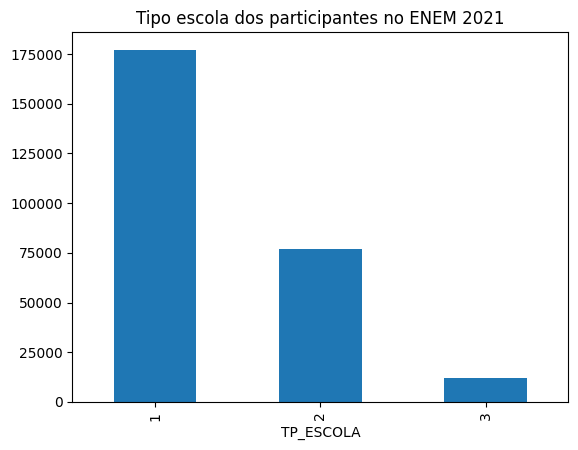

In [31]:
df.TP_ESCOLA.value_counts().plot(kind = 'bar')
plt.title('Tipo escola dos participantes no ENEM 2021')

Text(0.5, 1.0, 'Tipo sexos dos participantes no ENEM 2021')

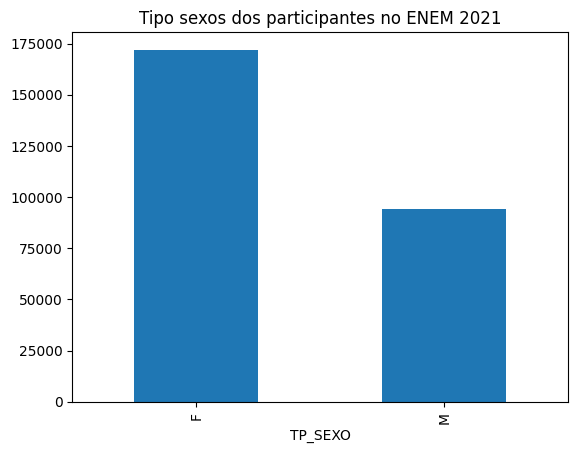

In [32]:
df.TP_SEXO.value_counts().plot(kind = 'bar')
plt.title('Tipo sexos dos participantes no ENEM 2021')

<Axes: title={'center': 'Municípios BA com maior QNT de inscritos no ENEM'}, xlabel='Quantidade', ylabel='Município'>

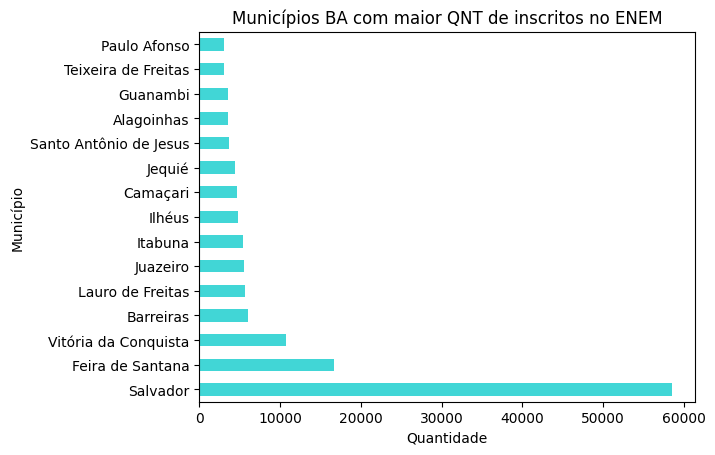

In [55]:
(df.NO_MUNICIPIO_PROVA
  .value_counts()
  .reset_index()
  .rename(columns= {'NO_MUNICIPIO_PROVA': 'Município', 'count': 'Quantidade'})
  .nlargest(n = 15, columns= 'Quantidade')
  .set_index('Município')
  .plot(
    kind= 'barh',
    color = '#1ccc',
    legend= False,
    xlabel= 'Quantidade',
    title= 'Municípios BA com maior QNT de inscritos no ENEM'
  )
)

<Axes: ylabel='count'>

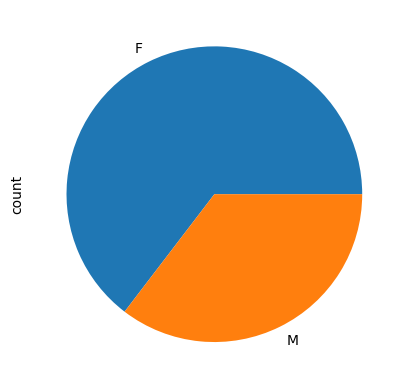

In [56]:
df.TP_SEXO.value_counts().plot(kind = 'pie')

In [59]:
df.TP_ESCOLA.map({1:'Não respondeu', 2: 'Pública', 3:'Privada'})

0               Pública
1               Pública
2               Pública
3         Não respondeu
4         Não respondeu
              ...      
266189    Não respondeu
266190    Não respondeu
266191    Não respondeu
266192    Não respondeu
266193    Não respondeu
Name: TP_ESCOLA, Length: 266194, dtype: object

<Axes: ylabel='count'>

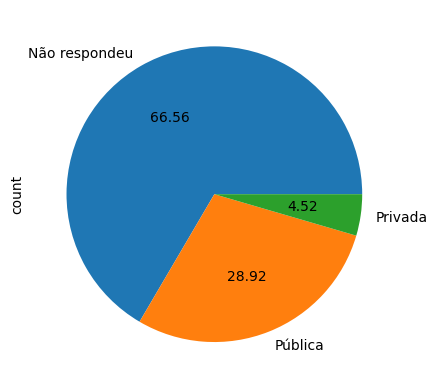

In [58]:
(
  df.TP_ESCOLA.map({1:'Não respondeu', 2: 'Pública', 3:'Privada'})
  .value_counts()
  .plot(
    kind    = 'pie',
    legend  = False,
    autopct = '%.2f'
    
    )
)

<Axes: xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

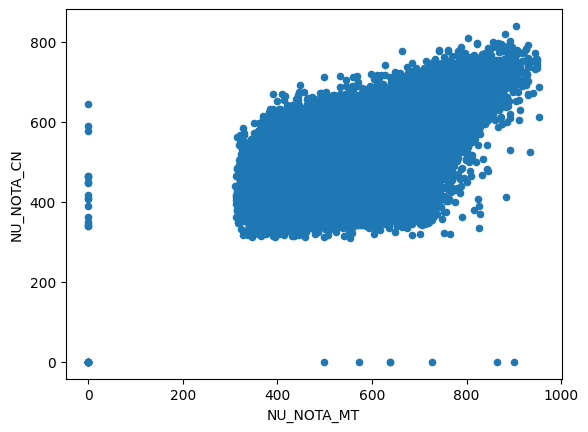

In [60]:
df.plot(kind= 'scatter', x= 'NU_NOTA_MT', y= 'NU_NOTA_CN')

<Axes: ylabel='Frequency'>

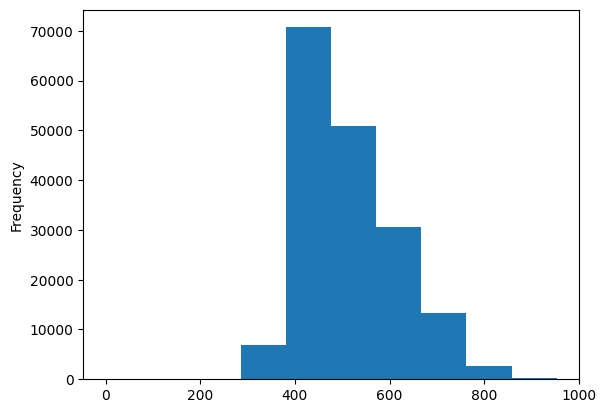

In [61]:
df.NU_NOTA_MT.plot(kind= 'hist')

<Axes: >

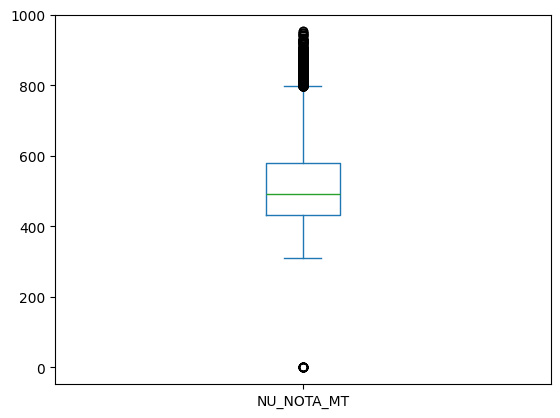

In [62]:
df.NU_NOTA_MT.plot(kind= 'box')

C:\Users\Aryman\AppData\Local\Temp\ipykernel_228\724566798.py:4: FutureWarning: The provided callable <function mean at 0x00000198FBEA4220> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg({'NU_NOTA_MT': np.mean})


<Axes: title={'center': 'Nota média em matemática'}, xlabel='Município', ylabel='Média em matemática'>

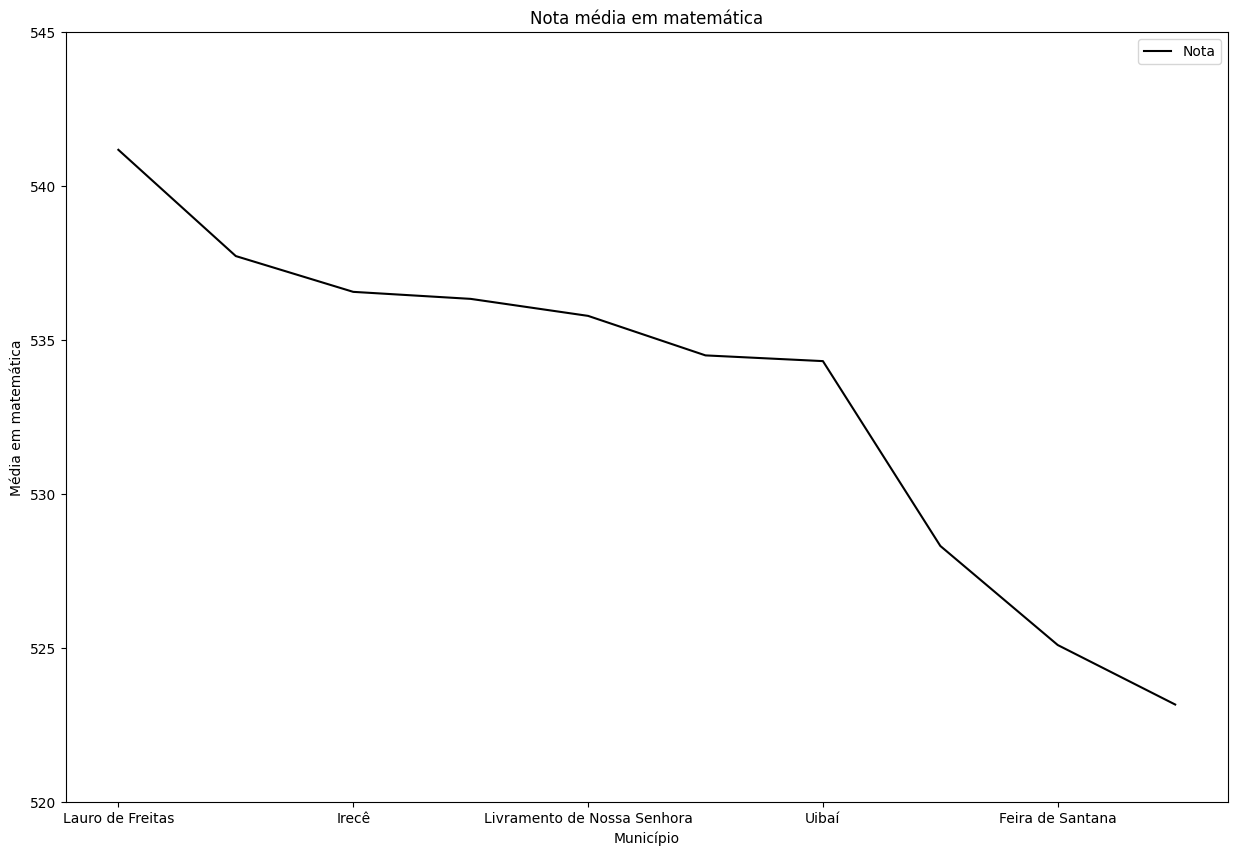

In [66]:
(
  df
  .groupby(by = ['NO_MUNICIPIO_PROVA'])
  .agg({'NU_NOTA_MT': np.mean})
  .reset_index()
  .rename(columns= {'NU_NOTA_MT': 'Nota', 'NO_MUNICIPIO_PROVA': 'Município'})
  .nlargest(n = 10, columns= 'Nota')
  .plot(
    x       = 'Município',
    y       = 'Nota',
    figsize = (15,10),
    color   = 'k',
    ylabel  = 'Média em matemática',
    title   = 'Nota média em matemática',
  ylim      = [520, 545]
  )
)

In [7]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

In [8]:
df_subset = df[idCandidato+provas].sample(n=10, random_state = 9999)

In [9]:
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


In [10]:
df_subset.sort_values(by = ['NU_NOTA_MT'], na_position= 'first', ascending= False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0


In [11]:
df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], na_position= 'first', ascending= [False, False])

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0


In [12]:
df_subset = df.query('NO_MUNICIPIO_PROVA == "Salvador"')[idCandidato+provas]

In [13]:
df_subset

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,210054173438,NaN,NaN,NaN,NaN,NaN
6,210053741476,453.4,438.3,503.4,379.5,600.0
9,210054171092,NaN,NaN,NaN,NaN,NaN
14,210053702687,603.3,622.5,571.7,729.2,860.0
17,210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...,...
266183,210053939844,NaN,NaN,NaN,NaN,NaN
266188,210054023670,463.8,474.9,333.3,357.8,280.0
266191,210051995005,NaN,NaN,NaN,NaN,NaN
266192,210053234415,NaN,NaN,NaN,NaN,NaN


In [14]:
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False).iloc[0:11, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


In [16]:
df_subset.nlargest(n = 10, columns = 'NU_NOTA_MT')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
50793,210051245410,717.1,774.0,669.3,926.8,920.0


In [17]:
df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending = False).iloc[0:11, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


In [18]:
df_subset.nsmallest(n = 10, columns =[ 'NU_NOTA_MT', 'NU_NOTA_CN'], keep= 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
216695,210054207985,0.0,328.9,364.2,0.0,0.0
237823,210054207908,0.0,389.1,343.9,0.0,820.0
237883,210052783728,339.7,749.7,723.1,0.0,440.0
256745,210051948246,343.3,403.4,337.4,0.0,0.0
151627,210053516497,389.2,0.0,328.7,0.0,0.0
36728,210052910938,448.4,0.0,366.3,0.0,600.0
99541,210052413138,461.9,340.8,381.5,0.0,620.0
40997,210053204001,577.5,611.7,637.3,0.0,740.0
263890,210053484663,426.6,502.8,516.5,315.3,600.0
264672,210051870014,421.6,513.2,483.5,315.4,480.0


In [20]:
df_subset

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,210054173438,NaN,NaN,NaN,NaN,NaN
6,210053741476,453.4,438.3,503.4,379.5,600.0
9,210054171092,NaN,NaN,NaN,NaN,NaN
14,210053702687,603.3,622.5,571.7,729.2,860.0
17,210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...,...
266183,210053939844,NaN,NaN,NaN,NaN,NaN
266188,210054023670,463.8,474.9,333.3,357.8,280.0
266191,210051995005,NaN,NaN,NaN,NaN,NaN
266192,210053234415,NaN,NaN,NaN,NaN,NaN


In [21]:
df_subset.set_index('NU_INSCRICAO', inplace = True)

In [22]:
df_subset.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
210054173438,NaN,NaN,NaN,NaN,NaN
210053741476,453.4,438.3,503.4,379.5,600.0
210054171092,NaN,NaN,NaN,NaN,NaN
210053702687,603.3,622.5,571.7,729.2,860.0
210054087112,414.6,420.5,368.6,399.4,480.0


In [23]:
df_test = df.copy().sample(10)
df_test = df_test.set_index(['NO_MUNICIPIO_PROVA', 'TP_SEXO'])

In [24]:
df_test

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA  \
NO_MUNICIPIO_PROVA     TP_SEXO                                          
Ilhéus                 F        210053758810    2021                6   
Santo Antônio de Jesus M        210054459530    2021                3   
Santaluz               F        210051398322    2021                5   
Brumado                F        210052206791    2021                8   
Juazeiro               F        210052654692    2021                5   
Salvador               M        210053302274    2021                2   
                       M        210051467338    2021                6   
Irecê                  F        210051431954    2021                7   
Itabuna                F        210051720427    2021               12   
Caravelas              F        210052203376    2021                3   

                                TP_ESTADO_CIVIL  TP_COR_RACA  \
NO_MUNICIPIO_PROVA     TP_SEXO                                 
Ilhéus                 F                      1            3   
Santo Antônio de Jesus M                      1            1   
Santaluz               F                      1            3   
Brumado                F                      1            1   
Juazeiro               F                      1            0   
Salvador               M                      1            3   
                       M                      1            3   
Irecê                  F                      2            3   
Itabuna                F                      2            3   
Caravelas              F                      1            3   

                                TP_NACIONALIDADE  TP_ST_CONCLUSAO  \
NO_MUNICIPIO_PROVA     TP_SEXO                                      
Ilhéus                 F                       1                1   
Santo Antônio de Jesus M                       1                2   
Santaluz               F                       1                1   
Brumado                F                       1                1   
Juazeiro               F                       1                1   
Salvador               M                       1                2   
                       M                       1                1   
Irecê                  F                       1                1   
Itabuna                F                       1                1   
Caravelas              F                       2                2   

                                TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  \
NO_MUNICIPIO_PROVA     TP_SEXO                                          
Ilhéus                 F                      3          1        NaN   
Santo Antônio de Jesus M                      0          3        1.0   
Santaluz               F                      3          1        NaN   
Brumado                F                      7          1        NaN   
Juazeiro               F                      2          1        NaN   
Salvador               M                      0          2        1.0   
                       M                      4          1        NaN   
Irecê                  F                      4          1        NaN   
Itabuna                F                     15          1        NaN   
Caravelas              F                      0          2        1.0   

                                IN_TREINEIRO  CO_MUNICIPIO_ESC  \
NO_MUNICIPIO_PROVA     TP_SEXO                                   
Ilhéus                 F                   0               NaN   
Santo Antônio de Jesus M                   0         2928703.0   
Santaluz               F                   0               NaN   
Brumado                F                   0               NaN   
Juazeiro               F                   0               NaN   
Salvador               M                   0         2927408.0   
                       M                   0               NaN   
Irecê                  F                   0               NaN   
Itabuna             

In [26]:
type(df_test.index)

pandas.core.indexes.multi.MultiIndex

In [27]:
df_subset = df_subset.reset_index(drop = False)

In [28]:
df_subset.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,210054173438,NaN,NaN,NaN,NaN,NaN
1,210053741476,453.4,438.3,503.4,379.5,600.0
2,210054171092,NaN,NaN,NaN,NaN,NaN
3,210053702687,603.3,622.5,571.7,729.2,860.0
4,210054087112,414.6,420.5,368.6,399.4,480.0
